<a href="https://colab.research.google.com/github/charu11/cats_and_dogs_classification/blob/cat_and_dog/CNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
from tqdm import tqdm


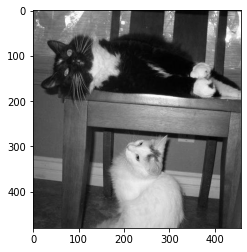

In [27]:
data_dir = '/content/drive/My Drive/cats_and_dogs_filtered/dataset/training_set'

CATEGORIES = ['cats', 'dogs']

for category in CATEGORIES:
  path = os.path.join(data_dir, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()

    break
  break


In [28]:
print(img_array)

[[97 98 97 ... 54 54 54]
 [88 92 95 ... 53 51 51]
 [88 94 99 ... 63 67 67]
 ...
 [49 48 47 ... 59 63 63]
 [46 45 45 ... 60 63 63]
 [43 42 42 ... 60 63 63]]


In [29]:
print(img_array.shape)

(480, 458)


In [0]:
IMG_SIZE = 150

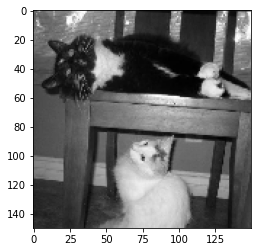

In [31]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')

In [44]:
# setting the training data
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(data_dir,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 1 or 2).

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num]) 
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()






100%|██████████| 3833/3833 [00:23<00:00, 161.78it/s]


In [45]:
print(len(training_data))

7907


In [0]:
import random

random.shuffle(training_data)



In [47]:
for sample in training_data[:10]:
  print(sample[1])

1
1
0
0
1
1
1
1
0
0


In [48]:
X = []
y = []

for features, labels in training_data:
  X.append(features)
  y.append(labels)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[206]
   [206]
   [207]
   ...
   [202]
   [200]
   [198]]

  [[208]
   [208]
   [209]
   ...
   [202]
   [204]
   [203]]

  [[210]
   [210]
   [211]
   ...
   [202]
   [200]
   [200]]

  ...

  [[111]
   [109]
   [112]
   ...
   [135]
   [139]
   [144]]

  [[111]
   [108]
   [109]
   ...
   [ 99]
   [130]
   [125]]

  [[108]
   [110]
   [113]
   ...
   [133]
   [136]
   [136]]]]


In [0]:
import pickle

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import pickle
import time

NAME = 'Cats-vs-dogs-64*2-CNN'

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
y = to_categorical(y)

X = X/255.0

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/Currency_notes/Logs/{}".format(NAME))
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )
 
model.fit(X, y,
          batch_size=32,
          epochs=10,
          validation_split=0.3,
          callbacks=[tensorboard])

model.save(f"/content/drive/My Drive/cats_and_dogs_filtered/{NAME}.h5")

In [101]:
def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)



model = tf.keras.models.load_model('/content/drive/My Drive/cats_and_dogs_filtered/Cats-vs-dogs-64*2-CNN.h5')

prediction = model.predict([prepare('/content/drive/My Drive/PetImages/Dog/643.jpg')])
print(prediction)

[[1.]]
